In [7]:
# https://blog.csdn.net/xlinsist/article/details/51475345
# 使用scikit-learn实现bagging来拟合Wine数据集-->实战bagging方法
## 比较了三种树型算法，分别为DT，Bagging，RF

import pandas as pd
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines', 'Proline']
df_wine = df_wine[df_wine['Class label'] != 1] #数据集中有三个类别 我们只使用其中的两个类别

y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values ## 为了可视化的目的 我们只选用其中的两个特征


from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
le = LabelEncoder()
y = le.fit_transform(y) # 把label转换为0和1
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.4, random_state=1) # 拆分训练集的40%作为测试集

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)

## 生成500个决策树，详细的参数参考官方文档
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)

## 度量单个决策树的准确性
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)

In [8]:
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 1.000/0.833


In [9]:
## 度量bagging分类器的准确性
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print("Bagging train/test accuracies %.3f/%.3f" % (bag_train, bag_test))

Bagging train/test accuracies 1.000/0.896


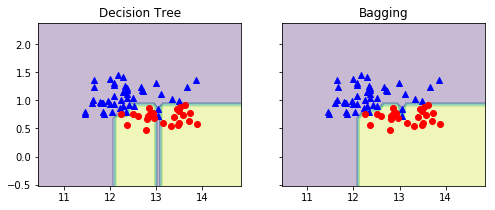

In [12]:
## 从上面的输出我们可以看到，Bagging分类器的效果的确要比单个决策树的效果好
## 下面，让我们打印出两个分类器的决策边界，看看它们之间有什么不同
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', marker='o')
    axarr[idx].set_title(tt)

plt.show()

In [13]:
## 由上图可以看出，Bagging分类器的决策边界更加的平滑。
# Bagging是不能减小模型的偏差的，因此我们要选择具有较低偏差的分类器来集成，例如没有修剪的决策树。

In [17]:
## 随机森林(RF)
## 随机森林在生成决策树时使用的是随机选择的特征。
"""
随机森林的步骤如下：
1. 从原始训练集中进行bootstrap抽样
2. 用步骤1中的bootstrap样本生成决策树
    1. 随机选择特征子集
    2. 用上面的特征子集来拆分树的节点
3. 重复1和2两个步骤
4. 集成所有生成的决策树进行预测

我们全部的特征大小为m，那么m‾‾√个特征子集是一个很好地选择
"""

## 下面用随机森林训练上面的Wine数据集，这次选用13个特征，输出用3个类别。


'\n随机森林的步骤如下：\n1. 从原始训练集中进行bootstrap抽样\n2. 用步骤1中的bootstrap样本生成决策树\n    1. 随机选择特征子集\n    2. 用上面的特征子集来拆分树的节点\n3. 重复1和2两个步骤\n4. 集成所有生成的决策树进行预测\n\n我们全部的特征大小为m，那么m‾‾√个特征子集是一个很好地选择\n'

In [18]:
import pandas as pd
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
y = df_wine['Class label'].values
X = df_wine.values[:, 1:]

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
le = LabelEncoder()
y = le.fit_transform(y) # 把label转换为0和1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,  random_state=1) # 拆分训练集的40%作为测试集

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_features='sqrt', max_depth=None, min_samples_split=2, bootstrap=True, n_jobs=1, random_state=1)
# 度量随机森林的准确性
rf = rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Random Forest train/test accuracies %.3f/%.3f' % (tree_train, tree_test)) 


Random Forest train/test accuracies 1.000/0.986


In [21]:
## 下面让我们使用scikit-learn来训练以下AdaBoost
from sklearn.ensemble import AdaBoostClassifier

## 决策桩分类器性能
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))


## Boosting分类器的性能
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=1000, learning_rate=0.1, random_state=0)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test)) 

Decision tree train/test accuracies 0.613/0.556
AdaBoost train/test accuracies 1.000/0.958
